In [23]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import preprocessing as ppr

from keras.optimizers import Adam
from keras.models import Sequential
from keras.layers import Dense
from keras.losses import mean_squared_error as mse
from keras.layers import LSTM
import keras.backend as K

In [24]:
dataset = pd.read_csv('./international-airline-passengers.csv', usecols = [1], header = 0)[:-1]

In [25]:
dataset = dataset.values

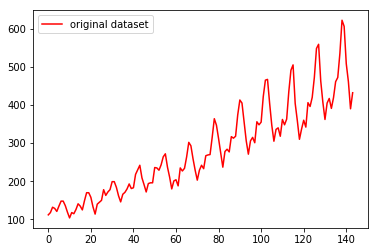

In [26]:
plt.plot(dataset, c='r', label = "original dataset")
plt.legend()
plt.show()

In [27]:
def train_test_set(dataset, percentage_train = 0.75):
    l = len(dataset)
    train_set_end_index = int(l * 0.67)
    test_set_start_index = train_set_end_index + 1
    train_set = dataset[:test_set_start_index]
    test_set = dataset[test_set_start_index:]
    return train_set, test_set

def supervised_learning_form(train_dataset, test_dataset):
    train_x = train_dataset[:-1]
    train_y = train_dataset[1:]
    test_x = test_dataset[:-1]
    test_y = test_dataset[1:]
    return train_x, train_y, test_x, test_y

In [28]:
scaler = ppr.MinMaxScaler(feature_range = (0, 1))
dataset = scaler.fit_transform(dataset)

train_set, test_set = train_test_set(dataset)
train_x, train_y, test_x, test_y = supervised_learning_form(train_set, test_set)

train_x = train_x.reshape(train_x.shape[0], train_x.shape[1], 1)
test_x = test_x.reshape(test_x.shape[0], test_x.shape[1], 1)

In [29]:
# define the model
tf.reset_default_graph()
K.clear_session()

model = Sequential()
model.add(LSTM(units = 20, input_shape = (train_x.shape[1], train_x.shape[2])))
model.add(Dense(units = 1))
model.compile(loss = 'mean_squared_error', optimizer = Adam())
model.summary()
model.fit(train_x, train_y, epochs = 20, batch_size = 1)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 20)                1760      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 21        
Total params: 1,781
Trainable params: 1,781
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
96/96 [==============================] - 1s 11ms/step - loss: 0.0349
Epoch 2/20
96/96 [==============================] - 1s 7ms/step - loss: 0.0147
Epoch 3/20
96/96 [==============================] - 1s 6ms/step - loss: 0.0123
Epoch 4/20
96/96 [==============================] - 1s 6ms/step - loss: 0.0105
Epoch 5/20
96/96 [==============================] - 1s 6ms/step - loss: 0.0089
Epoch 6/20
96/96 [==============================] - 1s 6ms/step - loss: 0.0074
Epoch 7/20
96/96 [==============================] - 1s 7ms/st

In [30]:
# perform predictions
y_train_predict = scaler.inverse_transform(model.predict(train_x))
y_test_predict = scaler.inverse_transform(model.predict(test_x))

In [31]:
combined = np.empty_like(dataset)
combined[:len(y_train_predict) + 1] = np.nan
combined[len(y_train_predict) + 1:-1] = y_test_predict
combined[-1] = np.nan

In [32]:
dataset = scaler.inverse_transform(dataset)

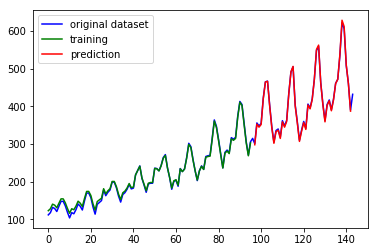

In [34]:
plt.plot(dataset, label = "original dataset", c = 'b')
plt.plot(y_train_predict, label = "training", c = 'g')
plt.plot(combined, label = "prediction", c = 'r')
plt.legend()
plt.show()